# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following [link](https://edimension.sutd.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_5261_1&content_id=_184406_1).


## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project. You are free to edit or add more cells if needed

## Students Submission

Student's Name:
- Name 1
- Name 2
- ...

### Problem Statement

Efficient fertilizer usage is critical for maximizing agricultural productivity and minimizing environmental impact. However, many countries face challenges in predicting crop yields based on the specific types and quantities of fertilizers applied. This lack of predictive insight can lead to overuse or underuse of fertilizers, resulting in reduced efficiency, increased costs, and environmental degradation. Developing an accurate prediction model for crop yields based on fertilizer inputs is essential to address these issues and support sustainable agricultural practices.

### Dataset

- Describe your dataset.
- Put the link to the sources of your raw dataset.
- Put python codes for loading the data into pandas dataframe(s). The data should be the raw data downloaded from the source. No pre-processing using any software (excel, python, etc) yet. Include this dataset in your submission
- Explain each column of your dataset (can use comment or markdown)
- State which column is the dependent variable (target) and explain how it is related to your problem statement
- State which columns are the independent variables (features) and describe your hypothesis on why these features can predict the target variable

In [1]:
#import all files needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
import random
from copy import deepcopy
from IPython.display import display

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2_score_sk
from sklearn.metrics import mean_squared_error as mse_sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import statsmodels.api as sm

from typing import Optional, Any
from typing import TypeAlias

Number : TypeAlias = float | int

In [2]:
# put Python code to load the raw data

# Load the dataset
#https://www.fao.org/faostat/en/#data/domains_table
#https://databank.worldbank.org/reports.aspx?source=2&series=NV.MNF.MTRN.ZS.UN&country=
#https://climateknowledgeportal.worldbank.org/country/ethiopia/climate-data-historical

# The CSV folder titled Nigeria Crop Yield contains all the independent variables necessary for analyzing and predicting agricultural output.
df = pd.read_csv('Nigeria weather.csv')
df_fert = pd.read_csv('Nigeria fertilizer.csv')
df_land = pd.read_csv('Nigeria agri land.csv')

# The dependent variable is the sum of all the crop yield for that year.. By analyzing crop yield, one can determine whether the amount of fertilizer used is optimal for achieving desired productivity.
get_sum_crop_yield = pd.read_csv('Nigeria Total crop.csv')

### Clean & Analyze your data
Use python code to:
- Clean your data
- Calculate Descriptive Statistics and other statistical analysis
- Visualization with meaningful analysis description

In [3]:
#Main dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              62 non-null     int64  
 1   country           62 non-null     object 
 2   avg_temp_c        62 non-null     float64
 3   precipitation_mm  62 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.1+ KB


In [4]:
#Fertilizer dataset info
display(df_fert)

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1961,1961,t,371.00,A,Official figure,Official data from questionnaire
1,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1962,1962,t,401.00,A,Official figure,Official data from questionnaire
2,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1963,1963,t,500.00,E,Estimated value,NaN
3,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1964,1964,t,1100.00,X,Figure from international organizations,Data sourced from another international organi...
4,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3102,Nutrient nitrogen N (total),1965,1965,t,2000.00,X,Figure from international organizations,Data sourced from another international organi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3104,Nutrient potash K (total),2018,2018,t,113700.00,E,Estimated value,Data sourced from IFA
182,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3104,Nutrient potash K (total),2019,2019,t,17378.84,I,Imputed value,NaN
183,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3104,Nutrient potash K (total),2020,2020,t,135725.55,I,Imputed value,NaN
184,RFN,Fertilizers by Nutrient,566,Nigeria,5157,Agricultural Use,3104,Nutrient potash K (total),2021,2021,t,105813.23,I,Imputed value,NaN


In [5]:
#Land area dataset info
df_land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       62 non-null     object 
 1   Domain            62 non-null     object 
 2   Area Code (M49)   62 non-null     int64  
 3   Area              62 non-null     object 
 4   Element Code      62 non-null     int64  
 5   Element           62 non-null     object 
 6   Item Code         62 non-null     int64  
 7   Item              62 non-null     object 
 8   Year Code         62 non-null     int64  
 9   Year              62 non-null     int64  
 10  Unit              62 non-null     object 
 11  Value             62 non-null     float64
 12  Flag              62 non-null     object 
 13  Flag Description  62 non-null     object 
 14  Note              0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 7.4+ KB


In [6]:
#Info for crop yield dataset
get_sum_crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       2891 non-null   object 
 1   Domain            2891 non-null   object 
 2   Area Code (M49)   2891 non-null   int64  
 3   Area              2891 non-null   object 
 4   Element Code      2891 non-null   int64  
 5   Element           2891 non-null   object 
 6   Item Code (CPC)   2891 non-null   float64
 7   Item              2891 non-null   object 
 8   Year Code         2891 non-null   int64  
 9   Year              2891 non-null   int64  
 10  Unit              2891 non-null   object 
 11  Value             2891 non-null   float64
 12  Flag              2891 non-null   object 
 13  Flag Description  2891 non-null   object 
 14  Note              0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 338.9+ KB


In [7]:
#get total of all crop yield per year
total_yield = get_sum_crop_yield.groupby('Year').sum()

# Aligning Year indices of total_yield and df while adding to a new column in df
df['yield_ton_per_ha'] = df['year'].map(total_yield['Value'])

df['agri_land_sqkm'] = df_land['Value']

# Fix: Extract only the 'Value' column as a Series for setting the single column in df
df['N_fertilizer_usage'] = df_fert.loc[(df_fert['Item'] == 'Nutrient nitrogen N (total)'), 'Value'].reset_index(drop=True)
df['P_fertilizer_usage'] = df_fert.loc[(df_fert['Item'] == 'Nutrient phosphate P (total)'), 'Value'].reset_index(drop=True)
df['K_fertilizer_usage'] = df_fert.loc[(df_fert['Item'] == 'Nutrient potash K (total)'), 'Value'].reset_index(drop=True)

df.describe()

,year,avg_temp_c,precipitation_mm,yield_ton_per_ha,agri_land_sqkm,N_fertilizer_usage,P_fertilizer_usage,K_fertilizer_usage
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1991.500000,26.818387,1085.404194,191009.211290,61148.528290,135574.324677,48777.726935,39631.055161
std,18.041619,0.416264,110.228803,13097.682298,5382.094178,127281.451474,39918.684606,36091.680213
min,1961.000000,25.950000,770.750000,162341.500000,54176.000000,371.000000,697.000000,103.000000
25%,1976.250000,26.552500,1014.257500,181191.850000,55943.000000,35000.000000,16643.967500,13625.000000
50%,1991.500000,26.800000,1081.345000,189717.550000,60015.500000,108950.000000,40061.000000,33723.000000
75%,2006.750000,27.135000,1170.790000,200905.000000,66302.965925,195227.480000,79424.285000,53558.577500
max,2022.000000,27.730000,1319.710000,214450.300000,69808.246300,591627.680000,144700.000000,136200.000000


In [8]:
# descriptive statistics

In [9]:
# visualization with analysis

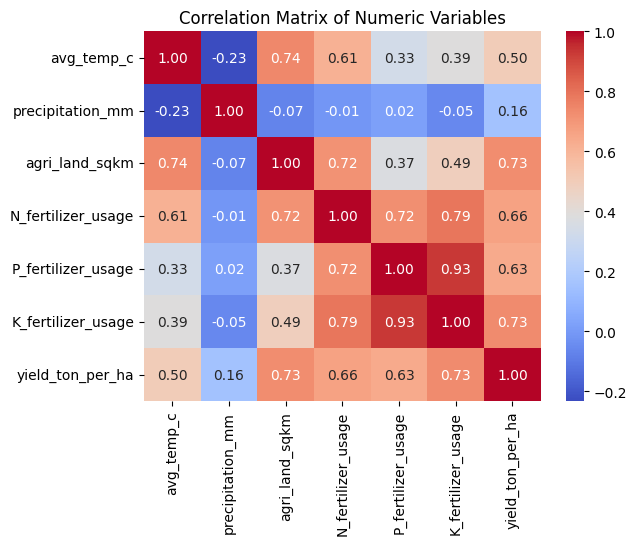

In [10]:
# Correlation matrix to see which variables to use
plt.figure()

correlation_matrix = df[["avg_temp_c","precipitation_mm","agri_land_sqkm","N_fertilizer_usage","P_fertilizer_usage","K_fertilizer_usage",'yield_ton_per_ha']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()
#Figure 1

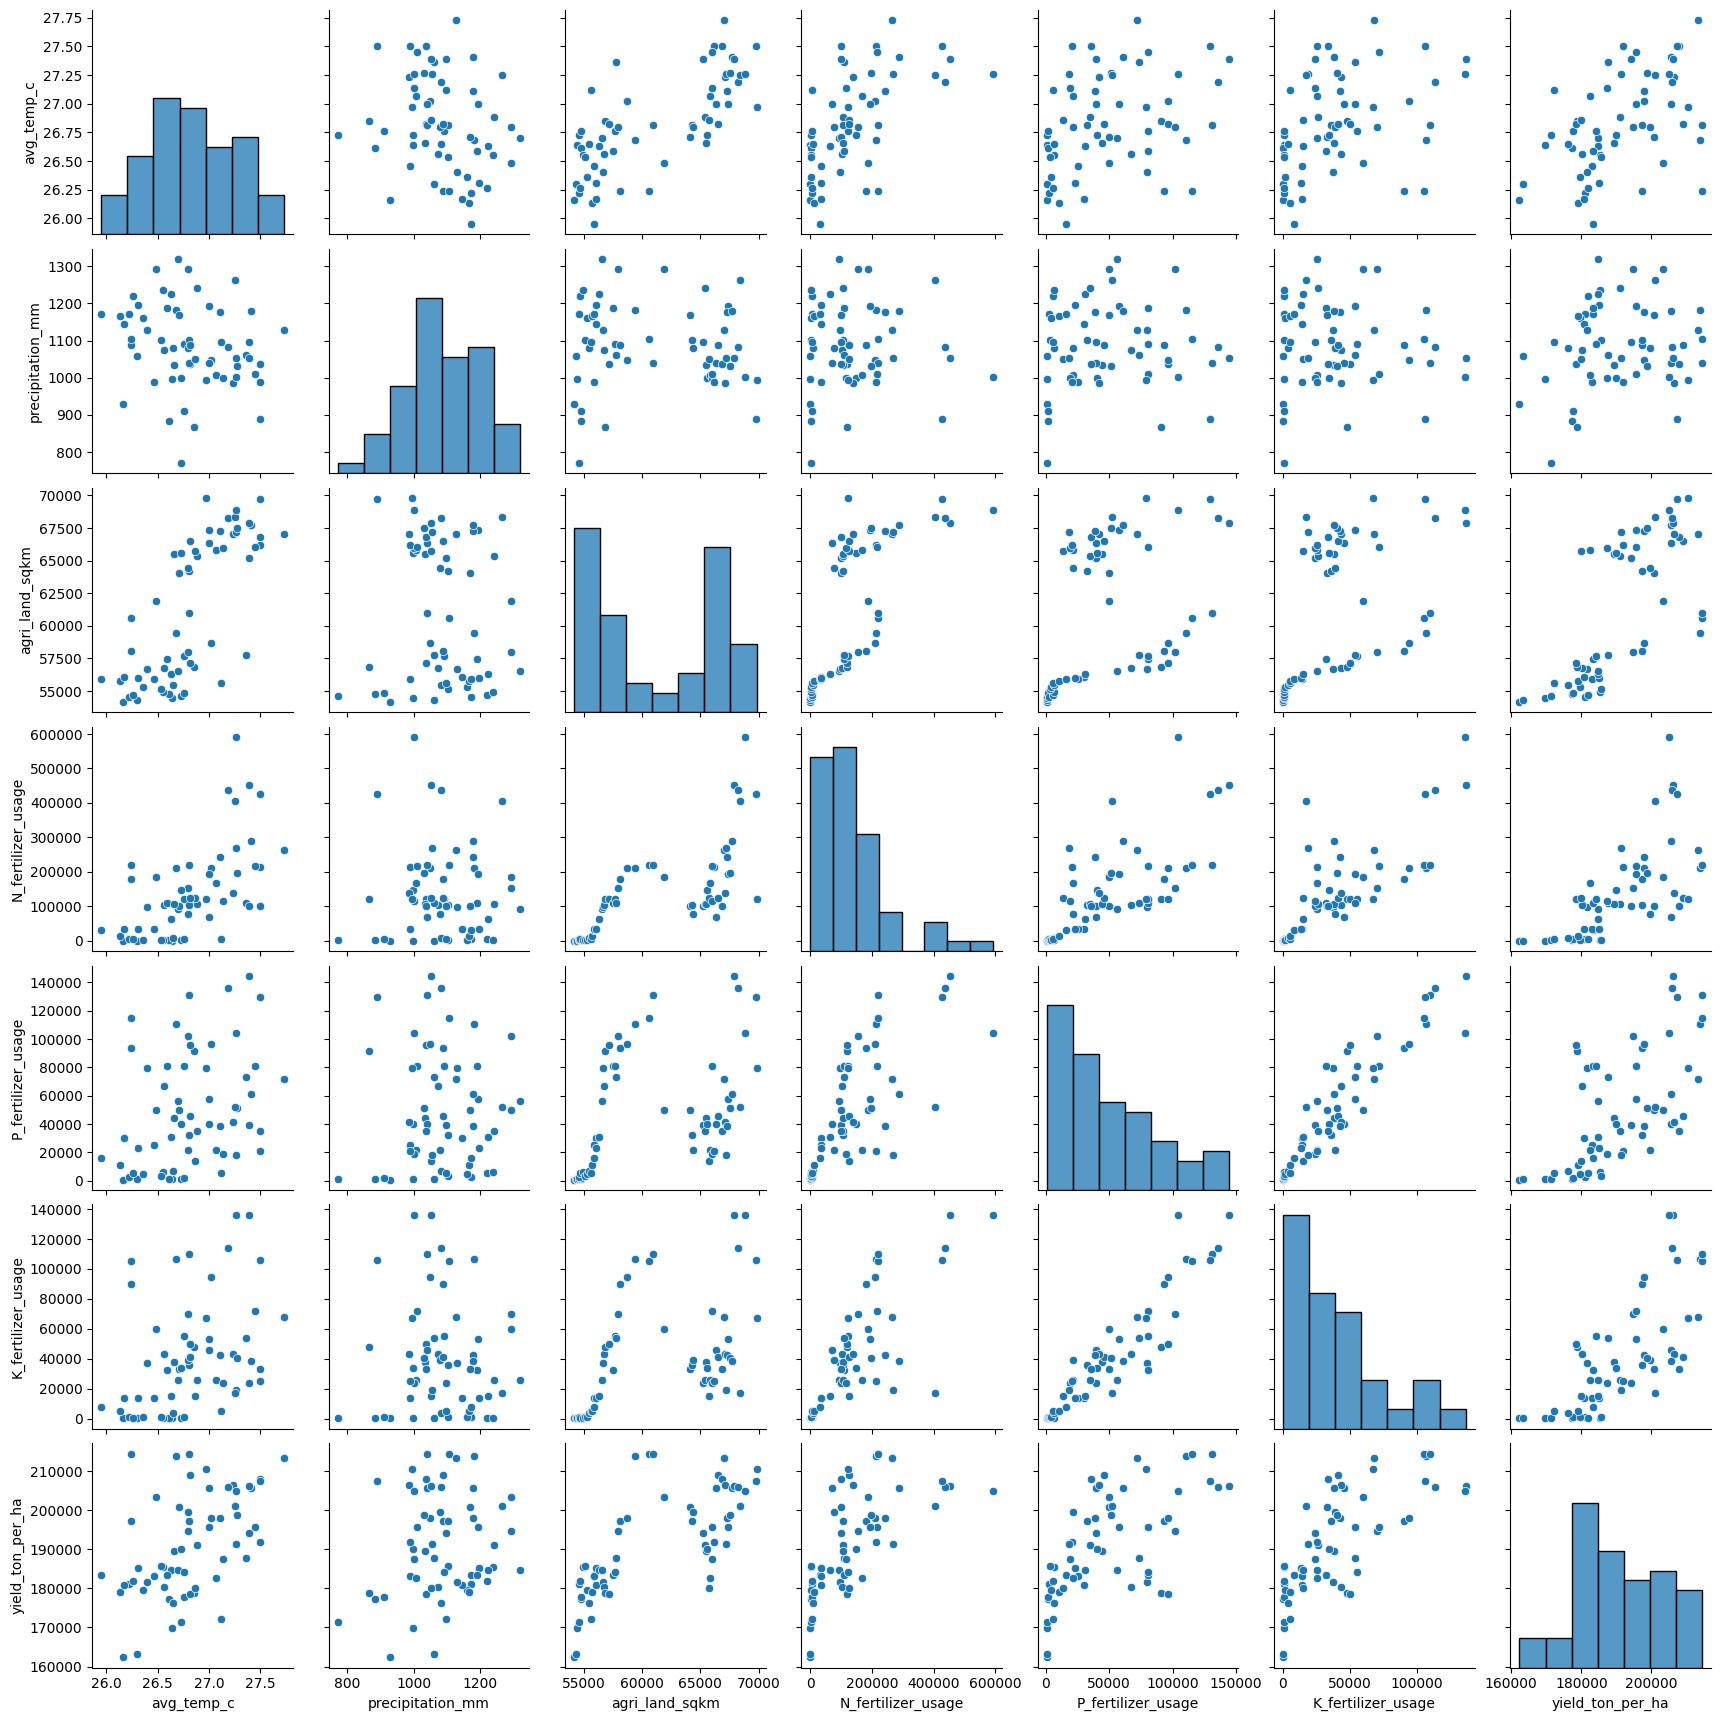

In [11]:
myplot: sns.axisgrid.PairGrid = sns.pairplot(data=df[["avg_temp_c","precipitation_mm","agri_land_sqkm","N_fertilizer_usage","P_fertilizer_usage","K_fertilizer_usage",'yield_ton_per_ha']])
#Figure 2

### Plotting X variables against Y

<Axes: xlabel='yield_ton_per_ha', ylabel='avg_temp_c'>

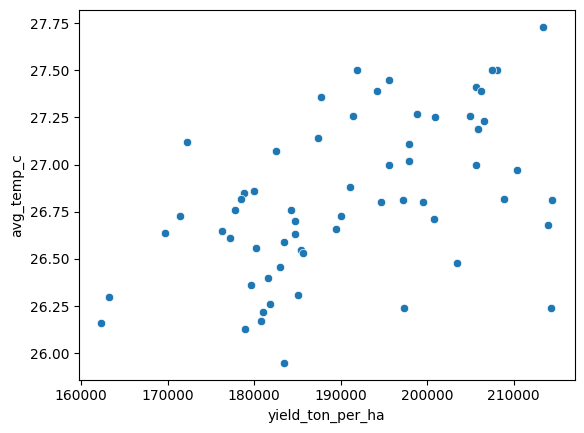

In [12]:
sns.scatterplot(data=df, x="yield_ton_per_ha", y="avg_temp_c")
#Figure 3

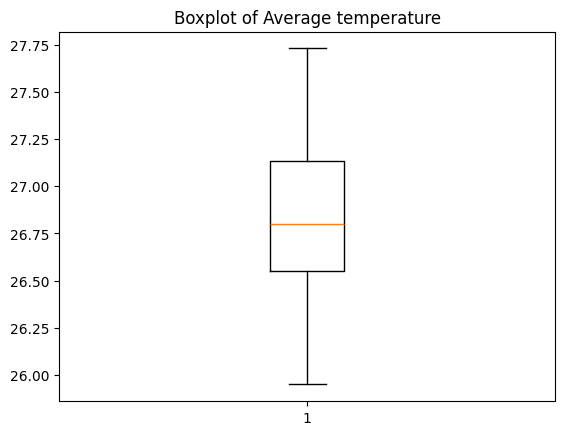

In [13]:
plt.boxplot(df['avg_temp_c'].dropna())
plt.title('Boxplot of Average temperature')
plt.show()
#Figure 4

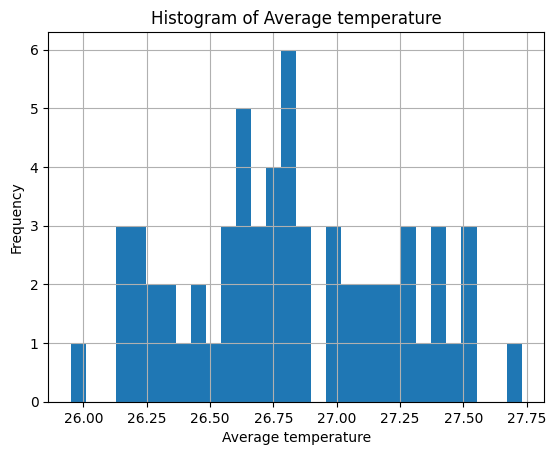

In [14]:
plt.hist(df["avg_temp_c"].dropna(), bins=30)
plt.xlabel('Average temperature')
plt.ylabel('Frequency') 
plt.title('Histogram of Average temperature')
plt.grid(True)
plt.show()
#Figure 5

Figure 3 shows the scatter relationship between yield_ton_per_ha against avg_temp_c. This graph suggests a positive correlation between yield_ton_per_ha and avg_temp_c as higher average temperatures generally corresponds to a higher yield. This correlation is supported in Figure 1 shows that the correlation value between yield_ton_per_ha and avg_temp_c is 0.50. Figure 4 shows the boxplot of avg_temp_c. There does not seem to be any outliers based on the figure. Figure 5 shows the histogram of avg_temp_c. The data does not appear to have a high degree of skewness. Therefore, this column most likely would not require transformation

<Axes: xlabel='yield_ton_per_ha', ylabel='agri_land_sqkm'>

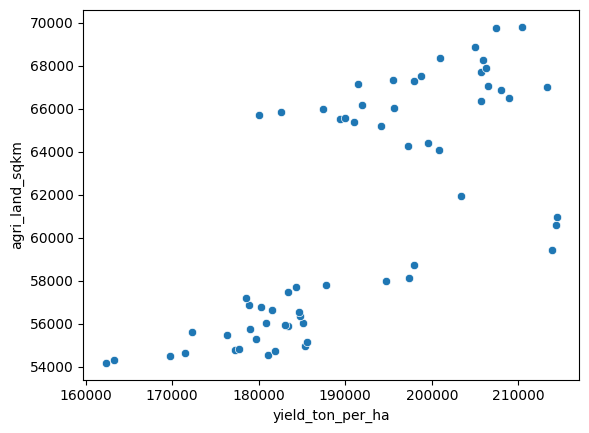

In [15]:
sns.scatterplot(data=df, x="yield_ton_per_ha", y="agri_land_sqkm")
#Figure 6

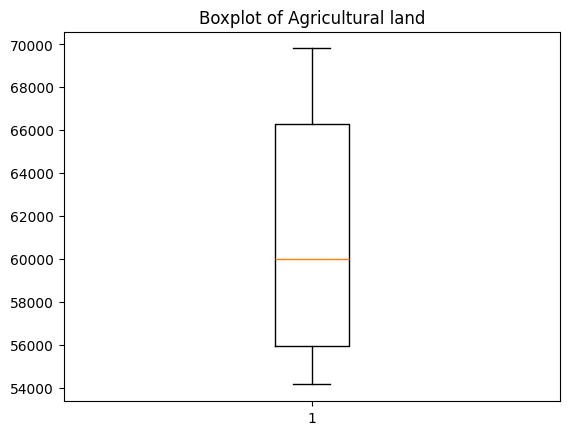

In [16]:
plt.boxplot(df['agri_land_sqkm'].dropna())
plt.title('Boxplot of Agricultural land')
plt.show()
#Figure 7

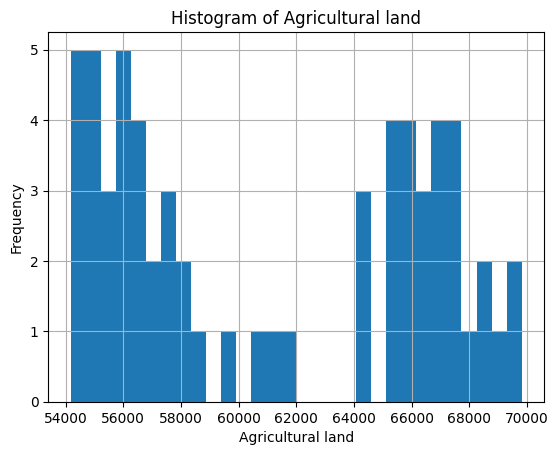

In [17]:
plt.hist(df["agri_land_sqkm"].dropna(), bins=30)
plt.xlabel('Agricultural land')
plt.ylabel('Frequency')
plt.title('Histogram of Agricultural land')
plt.grid(True)
plt.show()
#Figure 8

Figure 6 shows the scatter relationship between yield_ton_per_ha against agri_land_sqkm. The graph suggests a positive linear correlation between the yield_ton_per_ha and agri_land_sqkm. However, there is a noticeable gap between at the center of the graph. The positive correlation is also supported by Figure 1 shows that the correlation value between yield_ton_per_ha and agri_land_sqkm is 0.73. Figure 8 shows the boxplot of agri_land_sqkm. There does not seem to be any outliers as well and the data has a moderate spread. Figure 8 shows the histogram of agri_land_sqkm depicting a bimodal distribution. The first peak is around 56000sqkm while the second peak is around 66000sqkm.

<Axes: xlabel='yield_ton_per_ha', ylabel='precipitation_mm'>

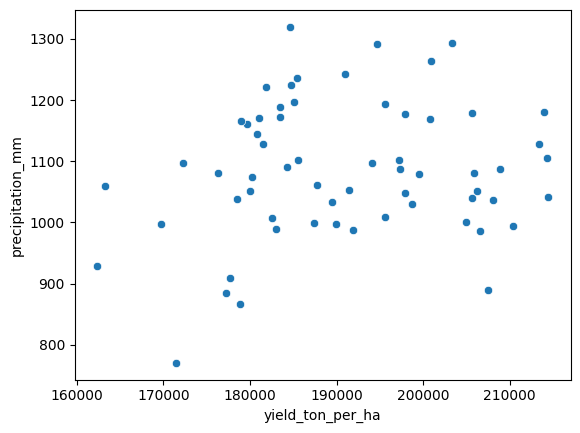

In [18]:
sns.scatterplot(data=df, x="yield_ton_per_ha", y="precipitation_mm")
#Figure 9

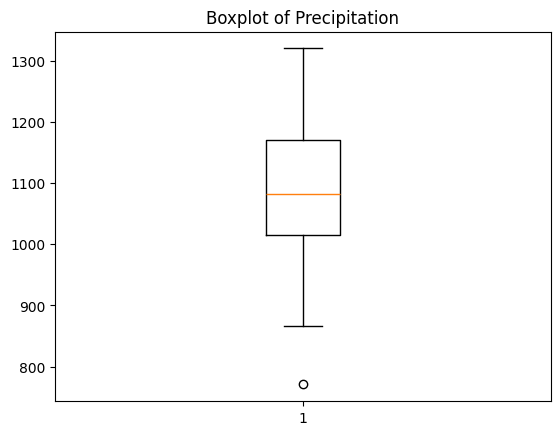

In [19]:
plt.boxplot(df['precipitation_mm'].dropna())
plt.title('Boxplot of Precipitation')
plt.show()
#Figure 10

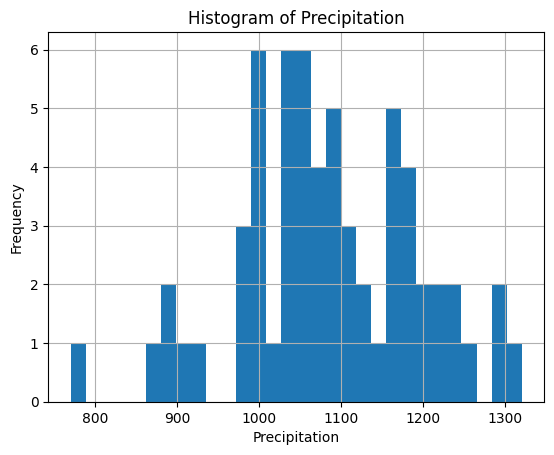

In [20]:
plt.hist(df["precipitation_mm"].dropna(), bins=30)
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation')
plt.grid(True)
plt.show()
#Figure 11

Figure 9 shows the scatter relationship between yield_ton_per_ha against precipitation_mm. The data points are scattered across the plot with no clear linear trend visible. This shows that there is no strong linear correlation between yield_ton_per_ha and precipitation_mm. Transformation will be needed to futher understand the relationship between the two columns. Figure 10 shows the boxplot of precipitation_mm. The data spread of this column is quite contained as the IQR does not seem to be that wide. From this boxplot, one outlier can be seen, however, since it is only one data point being an outlier, there is no need to remove it as it would not make a significant difference overall. Figure 11 shows the histogram of precipitation_mm. From the graph, the dataset seems to have a relatively symmertrical distribution, however, the same outlier can be seen in this graph as well.

<Axes: xlabel='yield_ton_per_ha', ylabel='N_fertilizer_usage'>

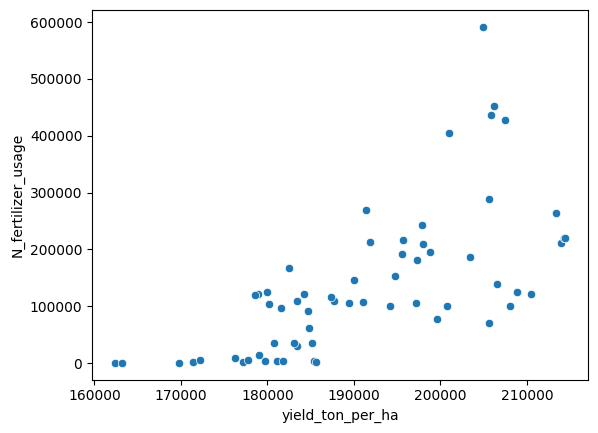

In [21]:
sns.scatterplot(data=df, x="yield_ton_per_ha", y="N_fertilizer_usage")
#Figure 12

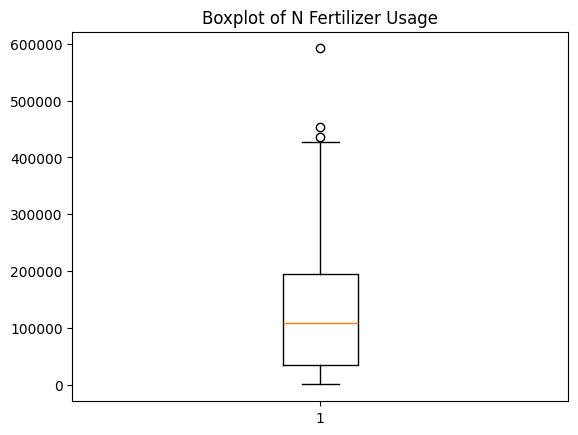

In [22]:
plt.boxplot(df['N_fertilizer_usage'].dropna())
plt.title('Boxplot of N Fertilizer Usage')
plt.show()
#Figure 13

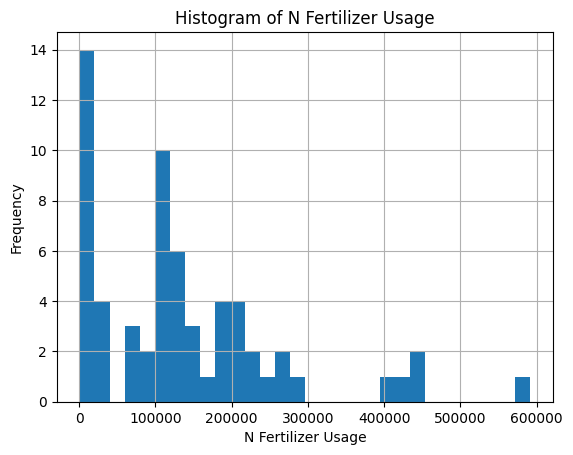

In [23]:
plt.hist(df["N_fertilizer_usage"].dropna(), bins=30)
plt.xlabel('N Fertilizer Usage')
plt.ylabel('Frequency')
plt.title('Histogram of N Fertilizer Usage')
plt.grid(True)
plt.show()
#Figure 14

Figure 12 shows the scatter relationship between yield_ton_per_ha against N_fertilizer_usage. The scatter plot shows a positive correlation between the two columns. This is further supported by Figure 1 which shows that the columns have a positive correlation of 0.63. Since the correlation between the columns is not that high, tranformation might be useful to check if there is a stronger relationship between them. Figure 13 shows the boxplot of N_fertilizer_usage. A few outliers can be seen past the upper whisker. However, the number of outliers is not that high that removing them would make a significant difference to the accuracy. Figure 14 shows the histogram of N_fertilizer_usage. From the graph, the dataset looks to be skewed to the right, indicating that a transformation might be needed to improve the accuracy.

<Axes: xlabel='yield_ton_per_ha', ylabel='P_fertilizer_usage'>

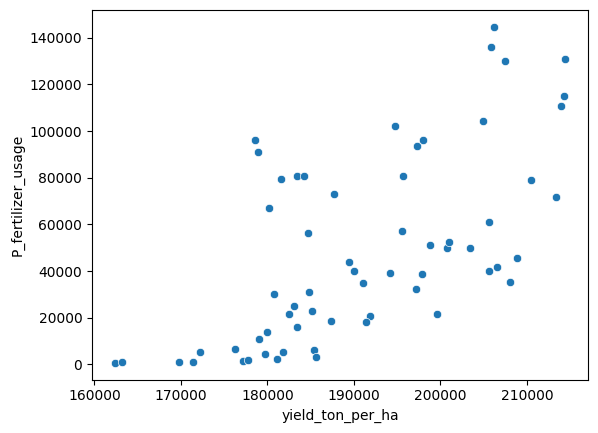

In [24]:
sns.scatterplot(data=df, x="yield_ton_per_ha", y="P_fertilizer_usage")
#Figure 15

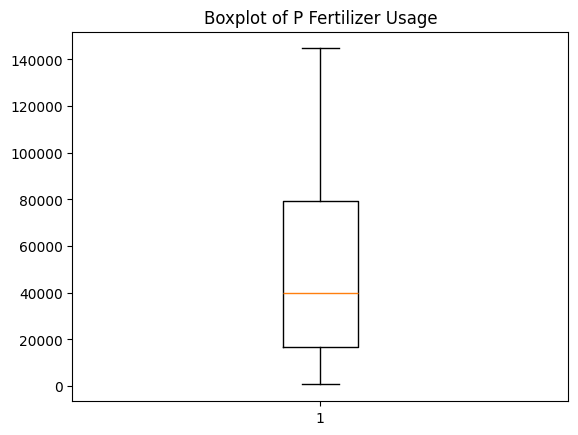

In [25]:
plt.boxplot(df['P_fertilizer_usage'].dropna())
plt.title('Boxplot of P Fertilizer Usage')
plt.show()
#Figure 16

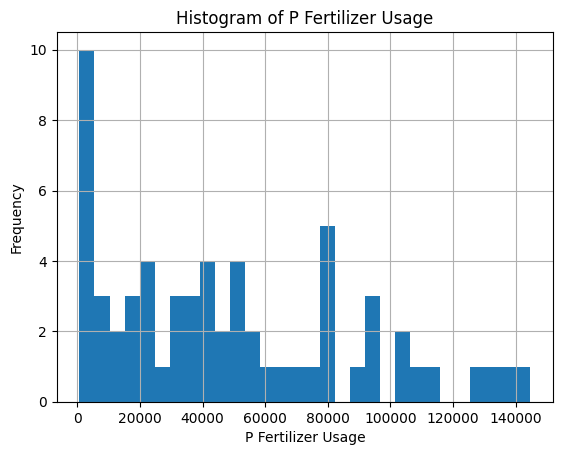

In [26]:
plt.hist(df["P_fertilizer_usage"].dropna(), bins=30)
plt.xlabel('P Fertilizer Usage')
plt.ylabel('Frequency')
plt.title('Histogram of P Fertilizer Usage')
plt.grid(True)
plt.show()
#Figure 17

Figure 15 shows the scatter relationship between yield_ton_per_ha against P_fertilizer_usage. The graph shows a positive correlation between yield_ton_per_ha and P_fertilizer_usage. This is further supported by Figure 1 which shows that the two columns have a correlation of 0.67. While there is some linear relationship between them, it is still weak so transformation could be used to determine any stronger relationship hidden. Figure 17 shows the histogram of P_fertilizer_usage. The graph shows that the data is very skewed to the right as the mode is all the way to the left. This indicates that log transformation might be used to help normalise the data.

<Axes: xlabel='yield_ton_per_ha', ylabel='K_fertilizer_usage'>

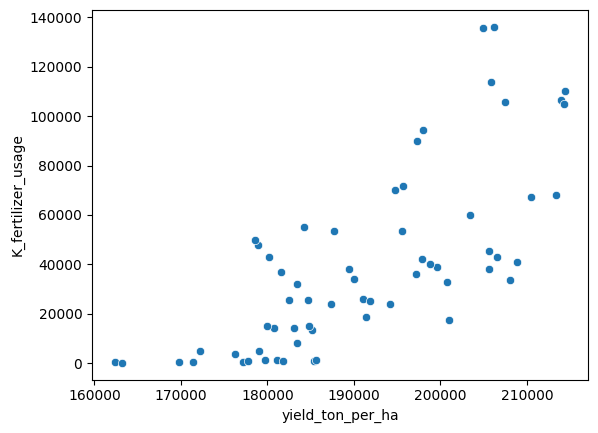

In [27]:
sns.scatterplot(data=df, x="yield_ton_per_ha", y="K_fertilizer_usage")
#Figure 18

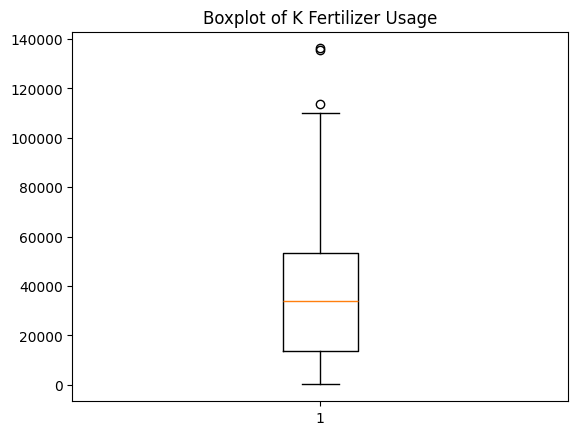

In [28]:
plt.boxplot(df['K_fertilizer_usage'].dropna())
plt.title('Boxplot of K Fertilizer Usage')
plt.show()
#Figure 19

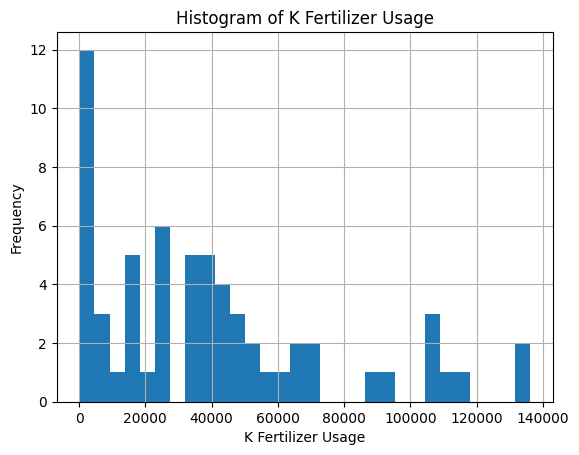

In [29]:
plt.hist(df["K_fertilizer_usage"].dropna(), bins=30)
plt.xlabel('K Fertilizer Usage')
plt.ylabel('Frequency')
plt.title('Histogram of K Fertilizer Usage')
plt.grid(True)
plt.show()
#Figure 20

Figure 18 shows the scatter relationship between yield_ton_per_ha against K_fertilizer_usage. There is a positive correlation between the two columns which is further supported by Figure 1 which shows the correlation value for the two columns as 0.73. However, the data shows a more non-linear trend which indicates that transformation might be needed. Figure 19 shows the boxplot of K_fertilizer_usage. There is 3 outliers in the uppoer whisker of the boxplot, however, as the number of outliers are small, there is no need to remove them as they would not effect the model's accuracy significantly. Figure 20 shows the histogram of K_fertilizer_usage. The graph shows a right-skewed distribution which indicate that log transformation might be needed to help standardise the data.

### Features and Target Preparation

Prepare features and target for model training.

In [30]:
#get the rows for the features and target
def get_features_targets(df: pd.DataFrame,
                         feature_names: list[str],
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target
    
# Add a rows of one to the beginning of the row to account for the bias
def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    np_feature_copy = np.copy(np_feature)
    list_of_ones = np.ones((np_feature_copy.shape[0], 1))
    return np.concatenate((list_of_ones, np_feature), axis=1)

#by nomralizing z, it ensures that features are on a common scale   
def normalize_z(array: np.ndarray, columns_means: Optional[np.ndarray] = None,
                columns_stds: Optional[np.ndarray] = None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if columns_means is None:
        columns_means = np.mean(array, axis=0)

    if columns_stds is None:
        columns_stds = np.std(array, axis=0)

    out = (array - columns_means) / columns_stds
    return out, columns_means, columns_stds


### Building Model

Use python code to build your model. Give explanation on this process.

In [31]:
#Add matrix X and martix Beta together
def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return np.matmul(X, beta)

#Predict using linear regression
def predict_linreg(array_feature: np.ndarray, beta: np.ndarray,
                   means: Optional[np.ndarray] = None,
                   stds: Optional[np.ndarray] = None) -> np.ndarray:
    X, _, _ = normalize_z(array_feature, means, stds)
    X = prepare_feature(X)
    predicted_y = calc_linreg(X, beta)
    return predicted_y

#Reduce/ minimize cost and lost during training of model
def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray,
                            alpha: float, num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    J_storage = np.zeros(num_iters)
    m = y.shape[0]

    for i in range(num_iters):
        y_hat = calc_linreg(X, beta)
        J = compute_cost_linreg(X, y, beta)
        J_storage[i] = J

        error = (y_hat - y)
        gradient = (1 / m) * np.matmul(X.T, error)

        beta -= alpha * gradient

    return beta, J_storage

#calcute cost for linear regression / quanifies prediction error
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    y_hat = calc_linreg(X, beta)
    error = (y_hat - y) ** 2
    J = (1 / (2 * X.shape[0])) * np.sum(error)
    return np.squeeze(J)

In [32]:
#split the data into 2, 1 for training and 1 for testing
def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame,
               random_state: Optional[int] = None,
               test_size: float = 0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    np.random.seed(random_state)
    index = np.random.choice(df_feature.index, int(len(df_feature) * test_size), replace=False)
    df_feature_test = pd.DataFrame(df_feature.loc[index])
    df_feature_train = df_feature.drop(index)

    df_target_test = pd.DataFrame(df_target.loc[index])
    df_target_train = df_target.drop(index)
    return df_feature_train, df_feature_test, df_target_train, df_target_test


In [33]:
def run_linear_regression(df_features,df_target,iterations=1500, alpha=0.01):
    df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,random_state=100,test_size=0.3)
    
    # Normalize the features using z normalization
    array_features_train_z, means, stds = normalize_z(df_features_train)

    # Change the features and the target to numpy array using the prepare functions
    X: np.ndarray = prepare_feature(array_features_train_z)
    target: np.ndarray =df_target_train.to_numpy()

    iterations: int = iterations
    alpha: float = alpha
    beta: np.ndarray = np.zeros((df_features.shape[1]+1,1))

    # Call the gradient_descent function
    beta, J_storage = gradient_descent_linreg(X,target,beta,alpha,iterations)

    # call the predict() method
    pred: np.ndarray = predict_linreg(df_features_test,beta,means,stds)

    # change target test set to a numpy array
    target: np.ndarray = df_target_test.to_numpy()
    
    return target, pred, beta

### Evaluating the Model

- Describe the metrics of your choice
- Evaluate your model performance

We evaluated our model's accuracy using three approaches. Initially, we calculated the R² value, but recognizing its limitations, we incorporated two additional metrics for a more comprehensive assessment: the relative error percentage and the mean of the NRMSE.

In [34]:
# To assess the error significance relative to the range
def root_mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    return np.sqrt(np.mean((target - pred) ** 2))

# Calculate R2
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_rest = np.sum((y - ypred) ** 2)
    return 1 - (ss_rest / ss_total)
# We use NRMSE to get the predicted 
def normalized_root_mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    range_y = np.max(y_true) - np.min(y_true)
    mean = rmse/y_true.mean()
    return mean    
    
#get the relative error
def calculate_relative_error(y_true: np.ndarray, y_pred: np.ndarray,rmse) -> float:
    # Calculate the range of the target values
    range_y = np.max(y_true) - np.min(y_true)
    # Calculate relative error as RMSE divided by the range
    relative_error = (rmse / range_y) * 100
    return relative_error

def eval_accuracy(target, pred):

    # Calculate r2 score and print result
    r2: float = r2_score(target,pred)

    # Calculate root mean squared error and print result
    rmse = root_mean_squared_error(target, pred)

    # Calculate relative error rounded to 1 decimal point and print result
    relative_error = calculate_relative_error(df_target,pred,rmse)

    # Calculate NRMSE for the current model
    nrmse = normalized_root_mean_squared_error(target, pred)

    return r2, rmse, relative_error, nrmse

In [35]:
#Get the features(x) and target(y)
df_feature_list = ["avg_temp_c",'precipitation_mm', 'P_fertilizer_usage','agri_land_sqkm'
                    ,'N_fertilizer_usage', 'K_fertilizer_usage']
df_features, df_target = get_features_targets(df,df_feature_list,["yield_ton_per_ha"])

In [36]:
target, pred,_ = run_linear_regression(df_features, df_target)
r2, rmse, relative_error, nrmse = eval_accuracy(target, pred)
print(f"R2 score: {r2}")
print(f"Root Mean squared error: {rmse}")
print(f"Relative error: {relative_error:.1f}%")
print(f'Normalized RMSE: {nrmse}')

# R2 score: 0.8560733342790819
# Root Mean squared error: 5450.717058198672
# Relative error: 10.5%
# Normalized RMSE: 0.028560841172216796

R2 score: 0.8560733342790819
Root Mean squared error: 5450.717058198672
Relative error: 10.5%
Normalized RMSE: 0.028560841172216796


### Creating the final the Model


### Improving the Model

- Improve the models by performing any data processing techniques or hyperparameter tuning.
- You can repeat the steps above to show the improvement as compared to the previous performance

Note:
- You should not change or add dataset at this step
- You are allowed to use library such as sklearn for data processing (NOT for building model)
- Make sure to have the same test dataset so the results are comparable with the previous model 
- If you perform hyperparameter tuning, it will require you to split your training data further into train and validation dataset

### Data Transformation

In [37]:
#Polynomial transformation by squaring the data
def transform_features_sq(df_feature: pd.DataFrame, colname: str) -> pd.DataFrame:
    df_feature[colname] = df_feature[colname] ** 2
    return df_feature

#Log transformation by logging the data. +1 to avoid any potential log(0) situations
def transform_features_log(df_feature: pd.DataFrame, colname: str) -> pd.DataFrame:
    df_feature[colname] = np.log(df_feature[colname] + 1)
    return df_feature

#Square root transformation by square rooting the data
def transform_features_sqrt(df_feature: pd.DataFrame, colname: str) -> pd.DataFrame: 
    df_feature[colname] = np.sqrt(df_feature[colname])
    return df_feature

In [38]:
#takes in one column and transforms it by log , square and square root
def eval_transformation(df_feature, df_target, colname, r2, rmse, relative_error, nrmse, func):

    #Deep copy over df_feature to avoid messing with the original dataset
    copydf= df_feature.copy(deep =True)

    #run the corresponding transformation functions
    func(copydf, colname)

    #Run linear regression model using the transformed dataset
    target,pred,_ = run_linear_regression(copydf,df_target)

    #Evaluate model's accuracy
    metrics = eval_accuracy(target,pred)

    #If metrics is better than the original metrics, return True along with the new set of better metrics
    #Else return False
    if metrics[0] > r2 and metrics[1] < rmse and metrics[2] < relative_error and metrics[3] < nrmse:
        return True, metrics
    else: 
        return False

#For each X variable , transform it by log , square and square root so that we can compare which transformation is better
best_r2 = r2
best_rmse = rmse
best_relative_error = relative_error
best_nrmse = nrmse

#Init the dict containing the list of transformations
transform_dict = {'Square transform': transform_features_sq, 'Log transform': transform_features_log, 'Square root transform': transform_features_sqrt}
for df_feature_column in df_feature_list:
    print(f'\nTesting {df_feature_column}')
    for k,v in transform_dict.items():
        results = eval_transformation(df_features, df_target, df_feature_column,best_r2, best_rmse, best_relative_error, best_nrmse, v)
        if results:
            best_r2 = results[1][0]
            best_rmse = results[1][1]
            best_relative_error = results[1][2]
            best_nrmse = results[1][3]
            print(f'{k}: {df_feature_column}')

    #Resets the best metrics with the original metrics after iterating through 
    #each transformation before going to the next column
    best_r2 = r2
    best_rmse = rmse
    best_relative_error = relative_error
    best_nrmse = nrmse


Testing avg_temp_c
Log transform: avg_temp_c

Testing precipitation_mm
Square transform: precipitation_mm

Testing P_fertilizer_usage

Testing agri_land_sqkm
Log transform: agri_land_sqkm
Square root transform: agri_land_sqkm

Testing N_fertilizer_usage
Square transform: N_fertilizer_usage

Testing K_fertilizer_usage


In [39]:
#df_features = transform_features_log(df_features, "avg_temp_c")
df_features = transform_features_sq(df_features, "precipitation_mm")
#df_features = transform_features_sqrt(df_features, "agri_land_sqkm")
df_features = transform_features_sq(df_features, "N_fertilizer_usage")

/tmp/ipykernel_355/2637551500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature[colname] = df_feature[colname] ** 2


In [40]:
target, pred,_ =run_linear_regression(df_features,df_target)
r2, rmse, relative_error, nrmse = eval_accuracy(target, pred)
print(f"R2 score: {r2}")
print(f"Root Mean squared error: {rmse}")
print(f"Relative error: {relative_error:.1f}%")
print(f'Normalized RMSE: {nrmse}')

# R2 score: 0.8560733342790818
# Root Mean squared error: 5450.717058198674
# Relative error: 10.5%
# Normalized RMSE: 0.028560841172216803

R2 score: 0.8625301687311918
Root Mean squared error: 5327.049181340086
Relative error: 10.2%
Normalized RMSE: 0.027912842284850112


Even though the output given by the eval_transformation function suggested log transforming avg_temp_c, square root transforming agri_land_sqkm,and polynomial transforming precipitation_mm and N_fertilizer_usage, after applying all the transformation, the metrics dropped. However, if we only transform precipitation_mm and N_fertilizer_usage, it will improve our metrics so we have decided to just transform those two columns.

In [41]:
df_features_test, df_target_test = get_features_targets(df,df_feature_list,["yield_ton_per_ha"])
df_features_test = df_features_test.drop('precipitation_mm', axis=1)
target_test, pred_test,_ = run_linear_regression(df_features_test, df_target_test)
r2_test, rmse_test, relative_error_test, nrmse_test = eval_accuracy(target_test, pred_test)
print(f"R2 score: {r2_test}")
print(f"Root Mean squared error: {rmse_test}")
print(f"Relative error: {relative_error_test:.1f}%")
print(f'Normalized RMSE: {nrmse_test}')

# R2 score: 0.8560733342790819
# Root Mean squared error: 5450.717058198672
# Relative error: 10.5%
# Normalized RMSE: 0.028560841172216796

R2 score: 0.7981884093875191
Root Mean squared error: 6454.402715647611
Relative error: 12.4%
Normalized RMSE: 0.033819985307411475


Even though the heatmap in Figure 1 depicts precipitation_mm as having a near 0 correlation, we have found that by dropping precipitation_mm, the metrics becomes worse than even the original untransformed metrics. Therefore, despite precipitation_mm having a low correlation to crop yield, we have chosen to keep the column in.

In [42]:
# calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

iv = df_features.columns
# compare with each column
[vif(df[iv].values, index) for index in range(len(iv))] 
 
# compare with each columns
for i in range(len(iv)):
    vif_list = [vif(df[iv].values, index) for index in range(len(iv))] 
    maxvif = max(vif_list)
    print("Max VIF value is ", maxvif)                      
    drop_index = vif_list.index(maxvif)
    print("For Independent variable", iv[drop_index])
    
    if maxvif > 10:
        
        print("Deleting", iv[drop_index])
        iv = iv.delete(drop_index)
        print("Final Independent_variables ", iv)

Max VIF value is  446.7706673077531
For Independent variable avg_temp_c
Deleting avg_temp_c
Final Independent_variables  Index(['precipitation_mm', 'P_fertilizer_usage', 'agri_land_sqkm',
       'N_fertilizer_usage', 'K_fertilizer_usage'],
      dtype='object')
Max VIF value is  80.47513039278152
For Independent variable agri_land_sqkm
Deleting agri_land_sqkm
Final Independent_variables  Index(['precipitation_mm', 'P_fertilizer_usage', 'N_fertilizer_usage',
       'K_fertilizer_usage'],
      dtype='object')
Max VIF value is  20.804662645700635
For Independent variable K_fertilizer_usage
Deleting K_fertilizer_usage
Final Independent_variables  Index(['precipitation_mm', 'P_fertilizer_usage', 'N_fertilizer_usage'], dtype='object')
Max VIF value is  5.2847032756684715
For Independent variable P_fertilizer_usage
Max VIF value is  5.2847032756684715
For Independent variable P_fertilizer_usage
Max VIF value is  5.2847032756684715
For Independent variable P_fertilizer_usage


In [43]:
#Prepare new data set using reccomended columns
#After that run the Linear Regression Model using the new dataset 
#and evaluate the accuracy of the new model
df_feature_list = ['precipitation_mm', 'P_fertilizer_usage', 'N_fertilizer_usage']
df_features_test, df_target_test = get_features_targets(df,df_feature_list,["yield_ton_per_ha"])
target_test, pred_test,_ = run_linear_regression(df_features_test, df_target_test)
r2_test, rmse_test, relative_error_test, nrmse_test = eval_accuracy(target_test, pred_test)
print(f"R2 score: {r2_test}")
print(f"Root Mean squared error: {rmse_test}")
print(f"Relative error: {relative_error_test:.1f}%")
print(f'Normalized RMSE: {nrmse_test}')

# R2 score: 0.8560733342790819
# Root Mean squared error: 5450.717058198672
# Relative error: 10.5%
# Normalized RMSE: 0.028560841172216796

R2 score: 0.5134356446258144
Root Mean squared error: 10021.971230939022
Relative error: 19.2%
Normalized RMSE: 0.05251344465382494


The metrics for the new data is significantly worse than the original mode, therefore, this will not be used

### Grid Search 

In [44]:
alpha_candidates = [0.001, 0.01, 0.1, 0.5]
iteration_candidates = [100, 500, 1500, 3000]

best_alpha = None
best_iteration = None
best_metrics = (r2, rmse, relative_error, nrmse)
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,random_state=100,test_size=0.3)

for a in alpha_candidates:
    for i in iteration_candidates:
        target, pred,_ =run_linear_regression(df_features_train,df_target_train, iterations=i, alpha=a)
        metrics = eval_accuracy(target, pred)
        if metrics[0] > best_metrics[0] and metrics[1] < best_metrics[1] and metrics[2] < best_metrics[2] and metrics[3] < best_metrics[3]:
            best_alpha = a
            best_iteration = i
            best_metrics = metrics

print(f'Best params: \nalpha: {best_alpha}\titeration: {best_iteration}')
print(f'Old R2 score: {r2}')
print(f'New R2 score: {best_metrics[0]}')
print(f'Old Root Mean squared error: {rmse}')
print(f'New Root Mean squared error: {best_metrics[1]}')
print(f'Old Relative error: {relative_error:.1f}%')
print(f'New Relative error: {best_metrics[2]:.1f}%')
print(f'Old Normalized RMSE: {nrmse}')
print(f'New Normalized RMSE: {best_metrics[3]}')

Best params: 
alpha: None	iteration: None
Old R2 score: 0.8625301687311918
New R2 score: 0.8625301687311918
Old Root Mean squared error: 5327.049181340086
New Root Mean squared error: 5327.049181340086
Old Relative error: 10.2%
New Relative error: 10.2%
Old Normalized RMSE: 0.027912842284850112
New Normalized RMSE: 0.027912842284850112


### Random Search 

In [45]:
num_of_trials = 100
best_alpha = None
best_iteration = None
best_metrics = (r2, rmse, relative_error, nrmse)
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features,df_target,random_state=100,test_size=0.3)

for _ in range(num_of_trials):
    test_alpha = random.uniform(0.001,0.1)
    test_iterations = random.randint(500,2000)
    target, pred,_ =run_linear_regression(df_features_train,df_target_train, iterations=test_iterations, alpha=test_alpha)
    metrics = eval_accuracy(target, pred)
    if metrics[0] > best_metrics[0] and metrics[1] < best_metrics[1] and metrics[2] < best_metrics[2] and metrics[3] < best_metrics[3]:
        best_alpha = alpha
        best_iteration = i
        best_metrics = metrics

print(f'Best params: \nalpha: {best_alpha}\titeration: {best_iteration}')
print(f'Old R2 score: {r2}')
print(f'New R2 score: {best_metrics[0]}')
print(f'Old Root Mean squared error: {rmse}')
print(f'New Root Mean squared error: {best_metrics[1]}')
print(f'Old Relative error: {relative_error:.1f}%')
print(f'New Relative error: {best_metrics[2]:.1f}%')
print(f'Old Normalized RMSE: {nrmse}')
print(f'New Normalized RMSE: {best_metrics[3]}')

Best params: 
alpha: None	iteration: None
Old R2 score: 0.8625301687311918
New R2 score: 0.8625301687311918
Old Root Mean squared error: 5327.049181340086
New Root Mean squared error: 5327.049181340086
Old Relative error: 10.2%
New Relative error: 10.2%
Old Normalized RMSE: 0.027912842284850112
New Normalized RMSE: 0.027912842284850112


After using GridSearch and RandomSearch, we have found that our original parameters of alpha=0.01 and iterations=1500 remain the best parameters for our model judging by our metrics. Therefore, the model will continue using these set of parameters

### Discussion and Analysis

- Analyze the results of your metrics.
- Explain how does your analysis and machine learning help to solve your problem statement.
- Conclusion

In [46]:
target, pred,beta = run_linear_regression(df_features, df_target)
r2, rmse, relative_error, nrmse = eval_accuracy(target, pred)
print(f"R2 score: {r2}")
print(f"Root Mean squared error: {rmse}")
print(f"Relative error: {relative_error:.1f}%")
print(f'Normalized RMSE: {nrmse}')

R2 score: 0.8625301687311918
Root Mean squared error: 5327.049181340086
Relative error: 10.2%
Normalized RMSE: 0.027912842284850112


Here are the results of our metrics for our final regression model. The final regression model achieved an R² score of 0.8625, indicating that approximately 86.25% of the variance in the crop yield is explained by the model. The Root Mean Squared Error (RMSE) was 5327.05, which is relatively low given the dataset range, reflecting good prediction accuracy. The Relative Error was 10.2%, demonstrating the model's precision, and the Normalized RMSE (NRMSE) was 0.028, further affirming its robustness. These metrics highlight that the model performs well in predicting crop yields using the selected features.

The project aimed to predict crop yields based on fertilizer usage and environmental factors. The model's insights enable efficient fertilizer use, reducing wastage and environmental damage while maintaining or improving agricultural productivity 

### Conclusion
The machine learning model demonstrates strong predictive capabilities for crop yields using fertilizer and environmental data. While improvements through feature transformations and hyperparameter tuning were considered, the original configuration with slight adjustments yielded the best performance. The methodology ensures resource optimization and supports evidence-based agricultural decisions, addressing the problem statement effectively. Future work could include adding more granular datasets or exploring non-linear models for further refinement.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1812442c-a0dd-4538-9f46-5efcc9b14c6a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>